In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import mpg
import re

In [139]:
dataset = pd.read_csv('training.csv')
display(dataset)

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,8378,57,2,3,3,1,2,2,0,1,...,-1,1,4,-5.811335,35.098103,0,1,0,0,1
7090,881,32,1,1,6,3,1,1,0,1,...,-1,1,1,-2.635156,32.945423,1,1,0,0,3
7091,6672,22,2,3,3,3,2,2,0,1,...,-1,4,4,-8.303729,31.059642,0,0,0,0,0
7092,5416,28,2,1,3,1,2,2,0,1,...,-1,1,4,-8.090712,35.836560,1,0,0,1,3


In [140]:
#Renaming columns for clarity and better understanding 

dataset.rename(columns={'Q1': 'Age', 
               'Q2': 'Gender', 'Q3' :'Marital status',
               'Q4': 'Level of Education', 'Q5':'Single response',
               'Q6':'Land owner', 'Q7':'Own a mobile phone?', 'Q8_1':'Salaries/wages', 'Q8_2':'Money from trading/selling' ,'Q8_3':'Money from providing a services' , 
               'Q8_4': 'Occasional jobs' , 'Q8_5': 'Rental income', 'Q8_6': 'Interest from savings, investments' ,'Q8_7':'Pension' , 'Q8_8':'Social welfare', 
               'Q8_9':'Rely on someone else','Q8_10':'Independent', 'Q8_11':'Other', 'Q9':'Source of income',
               'Q10':'Traders', 'Q11':'Service Providers','Q12':'Sent money to some with country', 'Q13':'When did you last send money?','Q14':'received money from someone','Q15':'When did you last receive money?',
               'Q16':'Use mobile money for purchases','Q17':'use mobile money for paying your bills?','Q18':'Literacy in Kiswhahili',
               'Q19':'Literacy in English'},inplace=True)

dataset.head()

,ID,Age,Gender,Marital status,Level of Education,Single response,Land owner,Own a mobile phone?,Salaries/wages,Money from trading/selling,...,use mobile money for paying your bills?,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


#### Examining the dataset.

In [141]:
# - Checking for missing values 
dataset.isnull().sum()

ID                                         0
Age                                        0
Gender                                     0
Marital status                             0
Level of Education                         0
Single response                            0
Land owner                                 0
Own a mobile phone?                        0
Salaries/wages                             0
Money from trading/selling                 0
Money from providing a services            0
Occasional jobs                            0
Rental income                              0
Interest from savings, investments         0
Pension                                    0
Social welfare                             0
Rely on someone else                       0
Independent                                0
Other                                      0
Source of income                           0
Traders                                    0
Service Providers                          0
Sent money

In [142]:
# - Checking for any duplicates

dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7089    False
7090    False
7091    False
7092    False
7093    False
Length: 7094, dtype: bool

In [143]:
dataset.dropna()

,ID,Age,Gender,Marital status,Level of Education,Single response,Land owner,Own a mobile phone?,Salaries/wages,Money from trading/selling,...,use mobile money for paying your bills?,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,8378,57,2,3,3,1,2,2,0,1,...,-1,1,4,-5.811335,35.098103,0,1,0,0,1
7090,881,32,1,1,6,3,1,1,0,1,...,-1,1,1,-2.635156,32.945423,1,1,0,0,3
7091,6672,22,2,3,3,3,2,2,0,1,...,-1,4,4,-8.303729,31.059642,0,0,0,0,0
7092,5416,28,2,1,3,1,2,2,0,1,...,-1,1,4,-8.090712,35.836560,1,0,0,1,3


### Dataset basic discription

In [144]:
dataset.describe()

,ID,Age,Gender,Marital status,Level of Education,Single response,Land owner,Own a mobile phone?,Salaries/wages,Money from trading/selling,...,use mobile money for paying your bills?,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


The maximum of people who were interviewed is 7094
The minimum age is 16 and the maximum is 100

## Visualisation

In [145]:
#- graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both)
# - and age, gender, marital status, land ownership and type of income.

dataset.head()

,ID,Age,Gender,Marital status,Level of Education,Single response,Land owner,Own a mobile phone?,Salaries/wages,Money from trading/selling,...,use mobile money for paying your bills?,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [146]:
Male = dataset[(dataset['Gender'] == 1)]
Female = dataset[(dataset['Gender'] == 2)]
Male.describe()

,ID,Age,Gender,Marital status,Level of Education,Single response,Land owner,Own a mobile phone?,Salaries/wages,Money from trading/selling,...,use mobile money for paying your bills?,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,3122.000000,3122.000000,3122.0,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,...,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000
mean,4722.603780,39.206278,1.0,1.772261,3.266176,2.373158,1.793722,1.295964,0.085202,0.674888,...,-0.350096,1.641896,2.964766,-6.056623,35.337667,0.627482,0.508328,0.473094,0.148943,1.991672
std,2738.099419,16.593633,0.0,1.239513,1.580663,1.576448,0.404697,0.456548,0.279226,0.468492,...,1.601460,1.223978,1.384924,2.703175,2.909334,0.483553,0.500011,0.499356,0.356089,1.156149
min,1.000000,16.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2377.500000,26.000000,1.0,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-8.300167,32.912624,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4718.500000,35.000000,1.0,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.130945,35.073172,1.000000,1.000000,0.000000,0.000000,3.000000
75%,7093.750000,49.750000,1.0,2.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-3.531331,38.385231,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,1.0,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.087705,40.255075,1.000000,1.000000,1.000000,1.000000,3.000000


In [147]:
Female.describe()

,ID,Age,Gender,Marital status,Level of Education,Single response,Land owner,Own a mobile phone?,Salaries/wages,Money from trading/selling,...,use mobile money for paying your bills?,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,3972.000000,3972.000000,3972.0,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,...,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,4758.365811,37.479607,2.0,1.799345,2.898036,2.687059,1.877392,1.478097,0.044058,0.594914,...,-0.496224,2.031722,3.319486,-6.016893,35.366889,0.496224,0.424723,0.401309,0.153072,1.648036
std,2725.863440,16.084996,0.0,1.103220,1.520257,1.485938,0.328028,0.499583,0.205251,0.490970,...,1.392767,1.420433,1.240382,2.734942,2.892068,0.500049,0.494363,0.490225,0.360102,1.206876
min,2.000000,16.000000,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.466611,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2411.500000,25.000000,2.0,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.240882,32.957542,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4774.000000,34.000000,2.0,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.072129,35.073337,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7107.500000,46.000000,2.0,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.487150,38.327971,1.000000,1.000000,1.000000,0.000000,3.000000
max,9457.000000,100.000000,2.0,4.000000,7.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


The male count is 3122 and Female count 3972 making a total of 7094

In [148]:
sex = {'Gender':{1:'Male',2:'Female'}}
dataset.replace(sex, inplace=True)

In [149]:
cleanup_nums = {'mobile_money_classification':{0:'No_financial_services',1:'Other_only',
                2:'Mm_only',3:'Mm_plus'}}

In [150]:
dataset.replace(cleanup_nums, inplace=True)


### financial services accessed Vs Age

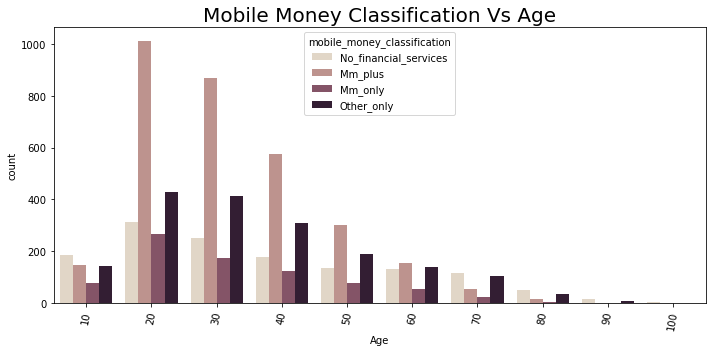

In [151]:
plt.figure(figsize = (10, 5))
dataset['Age'] = dataset.Age.apply(lambda x : int(x/10) * 10)
plt.title('Mobile Money Classification Vs Age', fontsize = 20)
plt.xticks( rotation = 80)
sns.countplot(x = 'Age', hue = 'mobile_money_classification', palette="ch:.25", data = dataset)
plt.tight_layout()
plt.show()

#sns.countplot(dataset['Age'], hue=dataset['mobile_money_classification'])  
#plt.show() 


With the age comparison it seems that as people mature in age they tend to stop using mobile money and they opt to use other financial service

### financial services accessed Vs Gender

In [152]:
# - The minimum age of particapants is 16 years and the max is 100 years
# - mobile_money_classification
# - Gender = { 1: "Male", 2: "Female"} 
#dataset['Gender'] = dataset["Gender"].map(Gender)

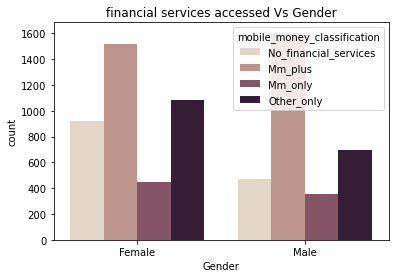

In [153]:
plt.title('financial services accessed Vs Gender')
sns.countplot(dataset['Gender'], hue=dataset['mobile_money_classification'],palette="ch:.25")  
plt.show()  


In the above it seems as if that both genders use mobile money and other financial service

### financial services accessed Vs Marital Status

In [154]:
Status = {'Marital status':{1:'Married',2:'Divorced',3:'Widowed',4:'Single'}}
dataset.replace(Status, inplace=True)


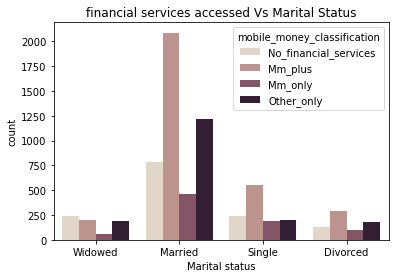

In [155]:
plt.title('financial services accessed Vs Marital Status')
sns.countplot(dataset['Marital status'] , hue=dataset['mobile_money_classification'],palette="ch:.25")  
plt.show()  


The Widowed and Divorced graphare almost relative the same, maybe that could be tied to the financial impact that comes with either the loss or separation from a spouse

#### Financial Services accessed vs land ownership

In [156]:
Ownership = {'Land owner':{1:'Yes',2:'No'}}
dataset.replace(Ownership, inplace=True)


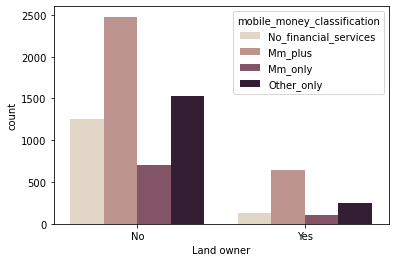

In [157]:
sns.countplot(dataset['Land owner'] , hue=dataset['mobile_money_classification'],palette="ch:.25")  
plt.show()  

In the above graph in seems that Land owners don't use mobile money or other financial services as much as those that own Land. The count is higher in all the bars if those that don't own land

### Financial services accessed vs Source of income 

In [158]:
#source_of_earnings ={'Salaries/wages':{1:'Yes',0:'No'},
#                    'Money from trading/selling': {1:'Yes',0:'No'},
 #                  'Occasional jobs':{1:'Yes',0:'No'},                          
  #                  'Rental income':{1:'Yes',0:'No'},                              
   #                 'Interest from savings, investments':{1:'Yes',0:'No'},        
    #                'Pension':{1:'Yes',0:'No'},                                    
     #               'Social welfare':{1:'Yes',0:'No'},                             
      #              'Rely on someone else':{1:'Yes',0:'No'},                       
       #             'Independent':{1:'Yes',0:'No'},                               
#            'Other':{1:'Yes',0:'No'}}
#dataset.replace(source_of_earnings, inplace=True)

## Relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

### Use if mobile services vs Age

In [179]:
Often_use ={'Use mobile money for purchases':{-1:'not applicable', 1:'Never',2:'Daily',3:'Weekly',4:'Monthly',5:'Less often than monthly'}}
dataset.replace(Often_use, inplace=True)

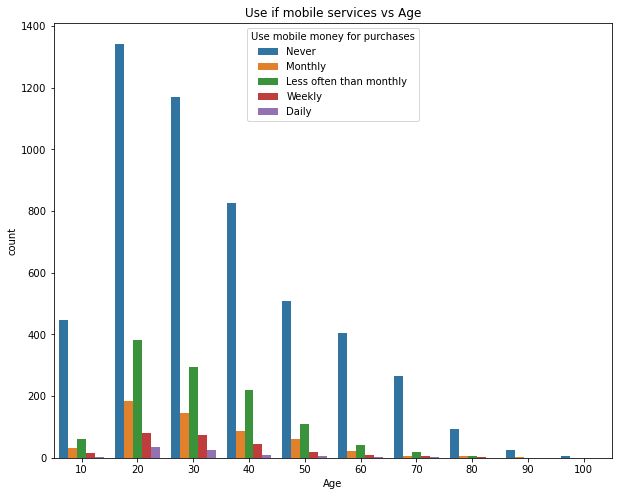

In [180]:
plt.figure(figsize = (10, 8))
sns.countplot(dataset['Age'] , hue=dataset['Use mobile money for purchases'])
plt.title('Use if mobile services vs Age')
plt.show()


In [181]:
Often_use_for_bills ={'use mobile money for paying your bills?':{-1:'not applicable', 1:'Never',2:'Daily',3:'Weekly',4:'Monthly',5:'Less often than monthly'}}
dataset.replace(Often_use_for_bills, inplace=True)

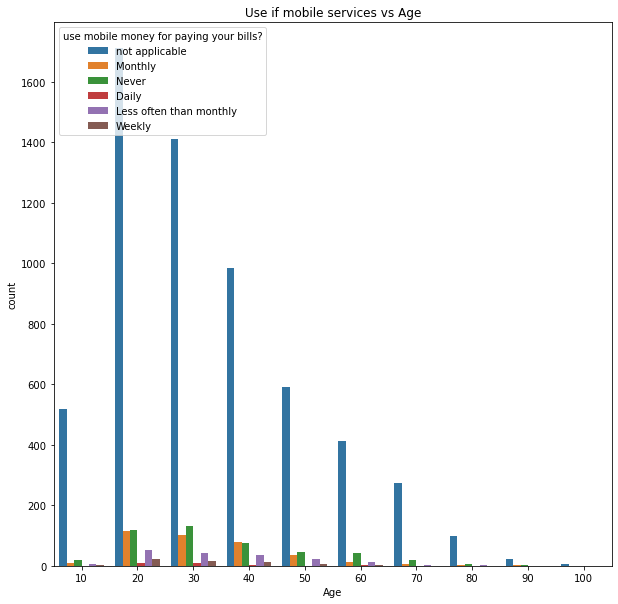

In [182]:
plt.figure(figsize = (10, 10))
plt.title('Use if mobile services vs Age')
sns.countplot(dataset['Age'] , hue=dataset['use mobile money for paying your bills?'])
plt.show()

### Use if mobile services vs Gender

In [183]:
dataset.filter(['Age','Gender', 'Marital status','Land owner','Use mobile money for purchases', 'use mobile money for paying your bills?']) 


,Age,Gender,Marital status,Land owner,Use mobile money for purchases,use mobile money for paying your bills?
0,90,Female,Widowed,No,Never,not applicable
1,40,Male,Married,Yes,Monthly,Monthly
2,10,Female,Single,No,Never,not applicable
3,50,Male,Married,Yes,Monthly,not applicable
4,30,Male,Married,No,Never,not applicable
...,...,...,...,...,...,...
7089,50,Female,Widowed,No,Never,not applicable
7090,30,Male,Married,Yes,Less often than monthly,not applicable
7091,20,Female,Widowed,No,Never,not applicable
7092,20,Female,Married,No,Never,not applicable


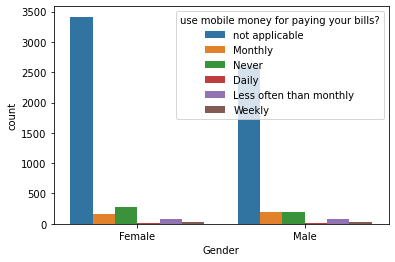

In [184]:
sns.countplot(dataset['Gender'] , hue=dataset['use mobile money for paying your bills?'])
plt.show()



In [193]:
#na_female = len(Female[Female['use mobile money for paying your bills?'] == -1])
#monthly_female = len(Female[Female['use mobile money for paying your bills?'] == 1])
#never_female = len(Female[Female['use mobile money for paying your bills?'] == 2])
#Daily_female = len(Female[Female['use mobile money for paying your bills?'] == 3])
#Less_female = len(Female[Female['use mobile money for paying your bills?'] == 4])
#weekly_female = len(Female[Female['use mobile money for paying your bills?'] == 5])

#print(na_female)
#print(monthly_female)
#print(never_female)
#print(Daily_female)
#print(Less_female)
#print(weekly_female)

#### Use mobile money for purchases

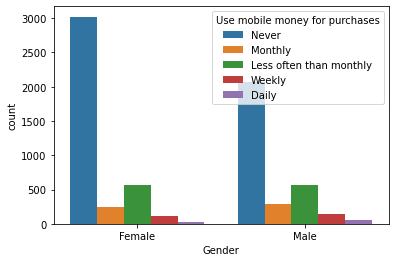

In [187]:
sns.countplot(dataset['Gender'] , hue=dataset['Use mobile money for purchases'])
plt.show()


### Use if mobile services vs Marital Status

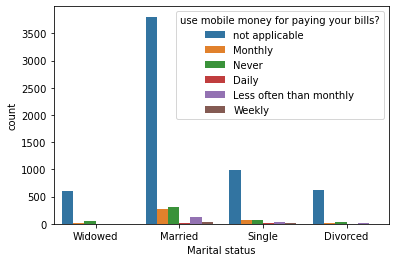

In [168]:
sns.countplot(dataset['Marital status'] , hue=dataset['use mobile money for paying your bills?'])
plt.show()


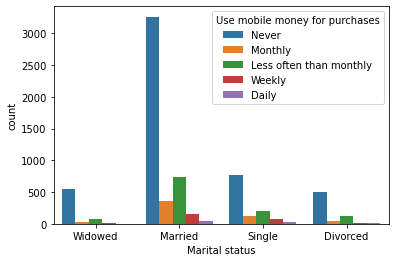

In [169]:
sns.countplot(dataset['Marital status'] , hue=dataset['Use mobile money for purchases'])
plt.show()



### Use if mobile services vs Land owner 

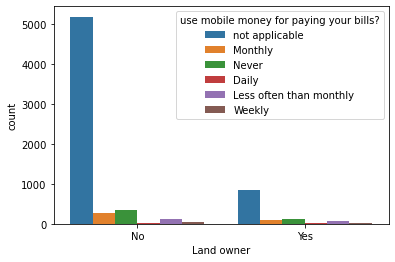

In [170]:
sns.countplot(dataset['Land owner'] , hue=dataset['use mobile money for paying your bills?'])
plt.show()

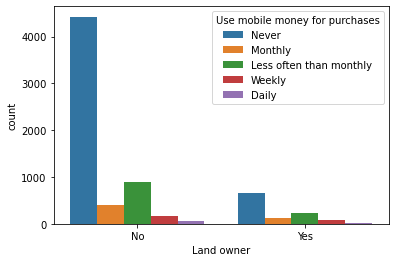

In [171]:
sns.countplot(dataset['Land owner'] , hue=dataset['Use mobile money for purchases'])
plt.show()

### Explore geographic distribution of mobile services coverage with respect to type of income.


0      -4.460442
1      -6.176438
2      -6.825702
3      -3.372049
4      -7.179645
          ...   
7089   -5.811335
7090   -2.635156
7091   -8.303729
7092   -8.090712
7093   -5.192204
Name: Latitude, Length: 7094, dtype: float64